PCA [0.006 0.001 0.296 0.177 0.59 ]
MDS [0.004 0.001 0.176 0.131 0.429]
ISOMAP [0.007 0.004 0.306 0.179 0.805]
TSNE [0.015 0.004 0.404 0.235 0.648]
UMAP [0.011 0.002 0.34  0.197 0.789]
PHATE [0.005 0.001 0.349 0.203 0.686]


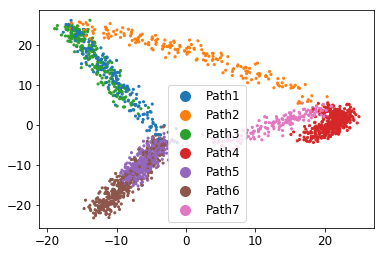

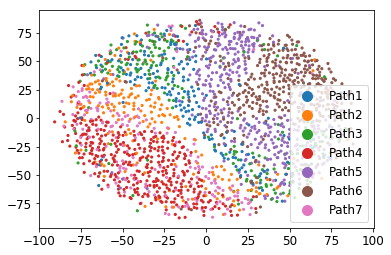

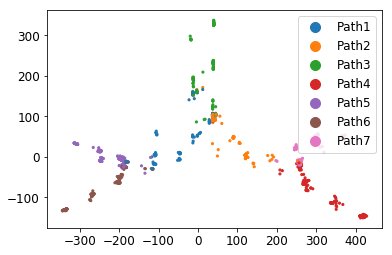

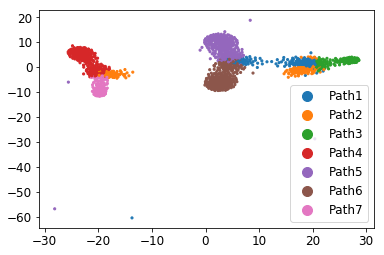

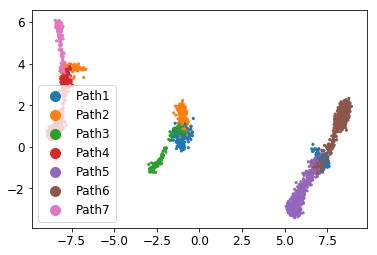

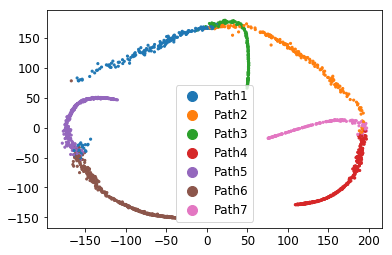

In [2]:
import sys
sys.path.append("..")

import scprep
import numpy as np
np.set_printoptions(precision=3, suppress=True)
from blog_tools import data, quantify, embed
%matplotlib inline

dataset = data.trajectory(size=2000, seed=45)

algorithms = embed.__all__
X_true = scprep.reduce.pca(dataset.X_true, 100)

for algorithm in algorithms:
    Y = algorithm(dataset.X)[:,:2]
    scprep.plot.scatter2d(Y, dataset.c)
    onenn = quantify.shared_neighbors(dataset.X, Y, knn=2)
    onenn_true = quantify.shared_neighbors(dataset.X_true, Y, knn=2)
    auc = quantify.shared_neighbors_AUC(dataset.X, Y)
    auc_true = quantify.shared_neighbors_AUC(dataset.X_true, Y)
    demap = quantify.DEMaP(X_true, Y)
    print(algorithm.__name__, np.array([onenn, onenn_true, auc, auc_true, demap]))